
Processing: annual-enterprise-2023-size-bands
+----+------------------+
|year|        avg(value)|
+----+------------------+
|2018|13678.382603008502|
|2011|10911.295006570303|
|2017|13252.536828135368|
|2013|11181.258064516129|
|2020|14847.101241018941|
|2015|12228.400132275132|
|2023|17303.886067708332|
|2014|11629.001320132013|
|2012|11188.700330033003|
|2016|          12749.85|
|2021|15284.167758846657|
|2022| 16562.47628458498|
|2019|14480.828402366864|
+----+------------------+

Runtime: 0.77 seconds

Processing: train.csv


+------------------------------+------------------+
|Stuning even for the non-gamer|            avg(2)|
+------------------------------+------------------+
|          Save yourself the...|               1.0|
|          Better routes ava...|               1.0|
|                       Skip it|               1.0|
|          This movie is a w...|               1.0|
|                  Dee's review|               2.0|
|                 I WOK TO COOK|               2.0|
|            Wonderful Imagery!|               2.0|
|           NO SPECIAL FEATURES|               1.0|
|                mediocre sound|               1.0|
|                  Oz is Great!|               2.0|
|          Is this a Mac OSX...|               2.0|
|          Reflection on the...|               2.0|
|                 Not worth it.|1.0024937655860349|
|          An unreal surreal...|               2.0|
|          Linkin Park is Aw...|               2.0|
|                       HELL YA|               2.0|
|           

+--------------------+------------------+
|               Group|   avg(Data_value)|
+--------------------+------------------+
|Age by employment...| 92588.50949948262|
|Sex by employment...| 510800.6229203906|
|Territorial autho...| 20175.17008719005|
|Industry by emplo...| 151704.0525094914|
|Region by employm...|100989.08021341635|
+--------------------+------------------+

Runtime: 0.76 seconds


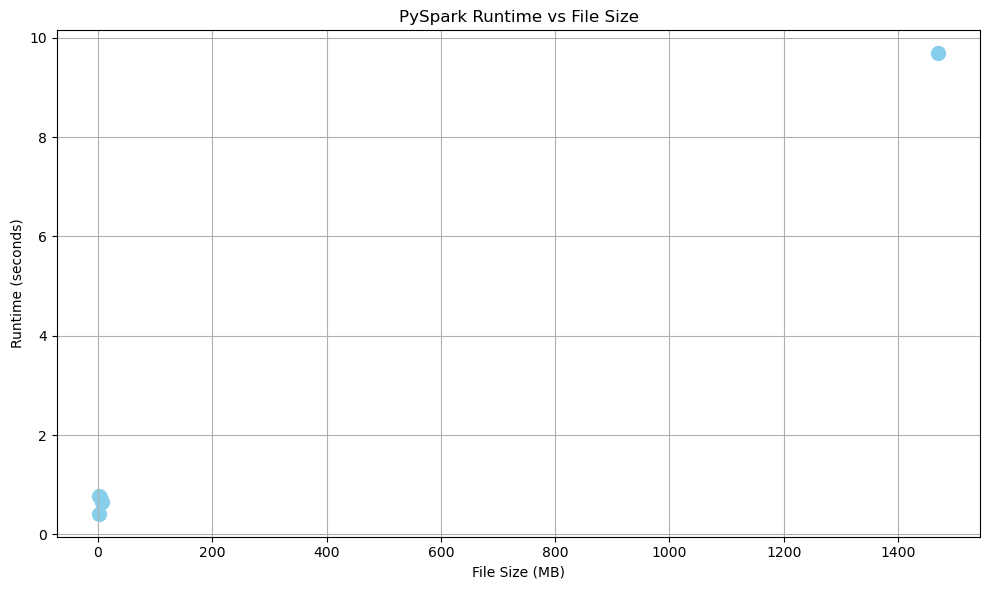

In [5]:
import time
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

spark = SparkSession.builder.appName("MYAPP").getOrCreate()

data_files = [
    {
        "name": "annual-enterprise-2023-size-bands",
        "path": "gs://dataproc-staging-us-central1-667037614087-6smxgfsy/data/annual-enterprise-survey-2023-financial-year-provisional-size-bands.csv",
        "group_col": "year",
        "value_col": "value",
        "size_mb": 1.68  # MB
    },
    {
        "name": "train.csv",
        "path": "gs://dataproc-staging-us-central1-667037614087-6smxgfsy/data/train.csv",
        "group_col": "Stuning even for the non-gamer",
        "value_col": "2",
        "size_mb": 1470  # 1.47 GB converted to MB
    },
    {
        "name": "annual-enterprise-2023",
        "path": "gs://dataproc-staging-us-central1-667037614087-6smxgfsy/data/annual-enterprise-survey-2023-financial-year-provisional.csv",
        "group_col": "year",
        "value_col": "value",
        "size_mb": 7.69  # MB
    },
    {
        "name": "business-financial-dec-2024",
        "path": "gs://dataproc-staging-us-central1-667037614087-6smxgfsy/data/business-financial-data-december-2024-quarter-csv.csv",
        "group_col": "Group",
        "value_col": "magnitude",
        "size_mb": 1.64  # MB
    },
    {
        "name": "employment-data-dec-2024",
        "path": "gs://dataproc-staging-us-central1-667037614087-6smxgfsy/data/machine-readable-business-employment-data-dec-2024-quarter.csv",
        "group_col": "Group",
        "value_col": "Data_value",
        "size_mb": 3.56  # MB
    }
]

# Lists to record runtime and file sizes
runtimes = []
file_sizes = []

# Loop through files to compute groupBy transformation runtimes
for file in data_files:
    print(f"\nProcessing: {file['name']}")
    
    # Load data from CSV and cast value column to double
    df = spark.read.csv(file["path"], header=True, inferSchema=True)
    df = df.withColumn(file["value_col"], col(file["value_col"]).cast("double"))
    
    # Time the transformation (groupBy and avg operation)
    start = time.time()
    df.groupBy(file["group_col"]).avg(file["value_col"]).show()
    end = time.time()

    runtime = end - start
    print(f"Runtime: {runtime:.2f} seconds")
    
    runtimes.append(runtime)
    file_sizes.append(file["size_mb"])

# Plotting runtime vs file size
plt.figure(figsize=(10, 6))
plt.scatter(file_sizes, runtimes, color='skyblue', s=100)
plt.xlabel('File Size (MB)')
plt.ylabel('Runtime (seconds)')
plt.title('PySpark Runtime vs File Size')
plt.grid(True)

plt.tight_layout()
plt.show()
